**Background**

**Project Task**

Classification task.
Data : Credict card defaulter payment
Source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

Description of the features:
ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 ((NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)


In [1]:
# Import all neccesary Libraries.
import pandas as pd
import numpy as np
from __future__ import division
from sklearn.preprocessing import MinMaxScaler
# Models
from sklearn.linear_model import LogisticRegression

# Data Preparation
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, cross_validate

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#Import Evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score
from sklearn.metrics import auc,roc_curve,classification_report
from sklearn.metrics import accuracy_score
# imports for vizualization
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Read csv file
data = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# check the quick summary of the dataframe.
# the the null-values, data types are obatined to see any inconsistencies.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
# Check for missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
#Drop the ID column since it is not useful.
data.drop("ID", inplace =True, axis = 1)

In [7]:
data.index

RangeIndex(start=0, stop=30000, step=1)

In [8]:
# statistical summary of the data
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000



There are 30000 distict credict card customers.
the average value for the amount of the credit card limit is 167484 witha standard deviation of 129,747 and a maximum of 1000000.

The average of the customers is 35.4
the average default is 0.22 meaning that about 22% might go default next month.


In [9]:
#make a copy of the original dataframe for project.
data_use = data.copy()

In [10]:
#First Five rows of the dataframe.
data_use.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [11]:
# column names of the dataframe.
data_use.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [12]:
# Get all the names of the columns into lowercase
# Rename the columns- sex, pay_o and default.payment.next.month(target) to gender, pay_1 and default respectively.

def lower_rename(dataframe):

  dict_empty = {}
  for col in data_use.columns:
    lower = col.lower()
    dict_empty[col] = lower
  dataframe = dataframe.rename(columns = dict_empty)
  dataframe.rename(columns= {"sex":"gender","pay_0":"pay_1", "default.payment.next.month": "default"}, inplace =True)
  
  return dataframe

In [13]:
#Save it to a dataframe variable to worl with.
df_renamed = lower_rename(data_use)

In [14]:
df_renamed.head(10)

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [15]:
 #From the top 10 rows it is evident that gender, education, default and marriage are categorical

In [16]:
# check the unique values in the categorical variables.
list_cat = ["gender", "marriage","education"]
for item in list_cat:
  for col in df_renamed.columns:
    if item == col:
      uniques = df_renamed[col].unique()
  print(item, "has unique values of {}".format(uniques))

gender has unique values of [2 1]
marriage has unique values of [1 2 3 0]
education has unique values of [2 1 3 5 4 6 0]


In [17]:
len(df_renamed.columns.tolist())

24

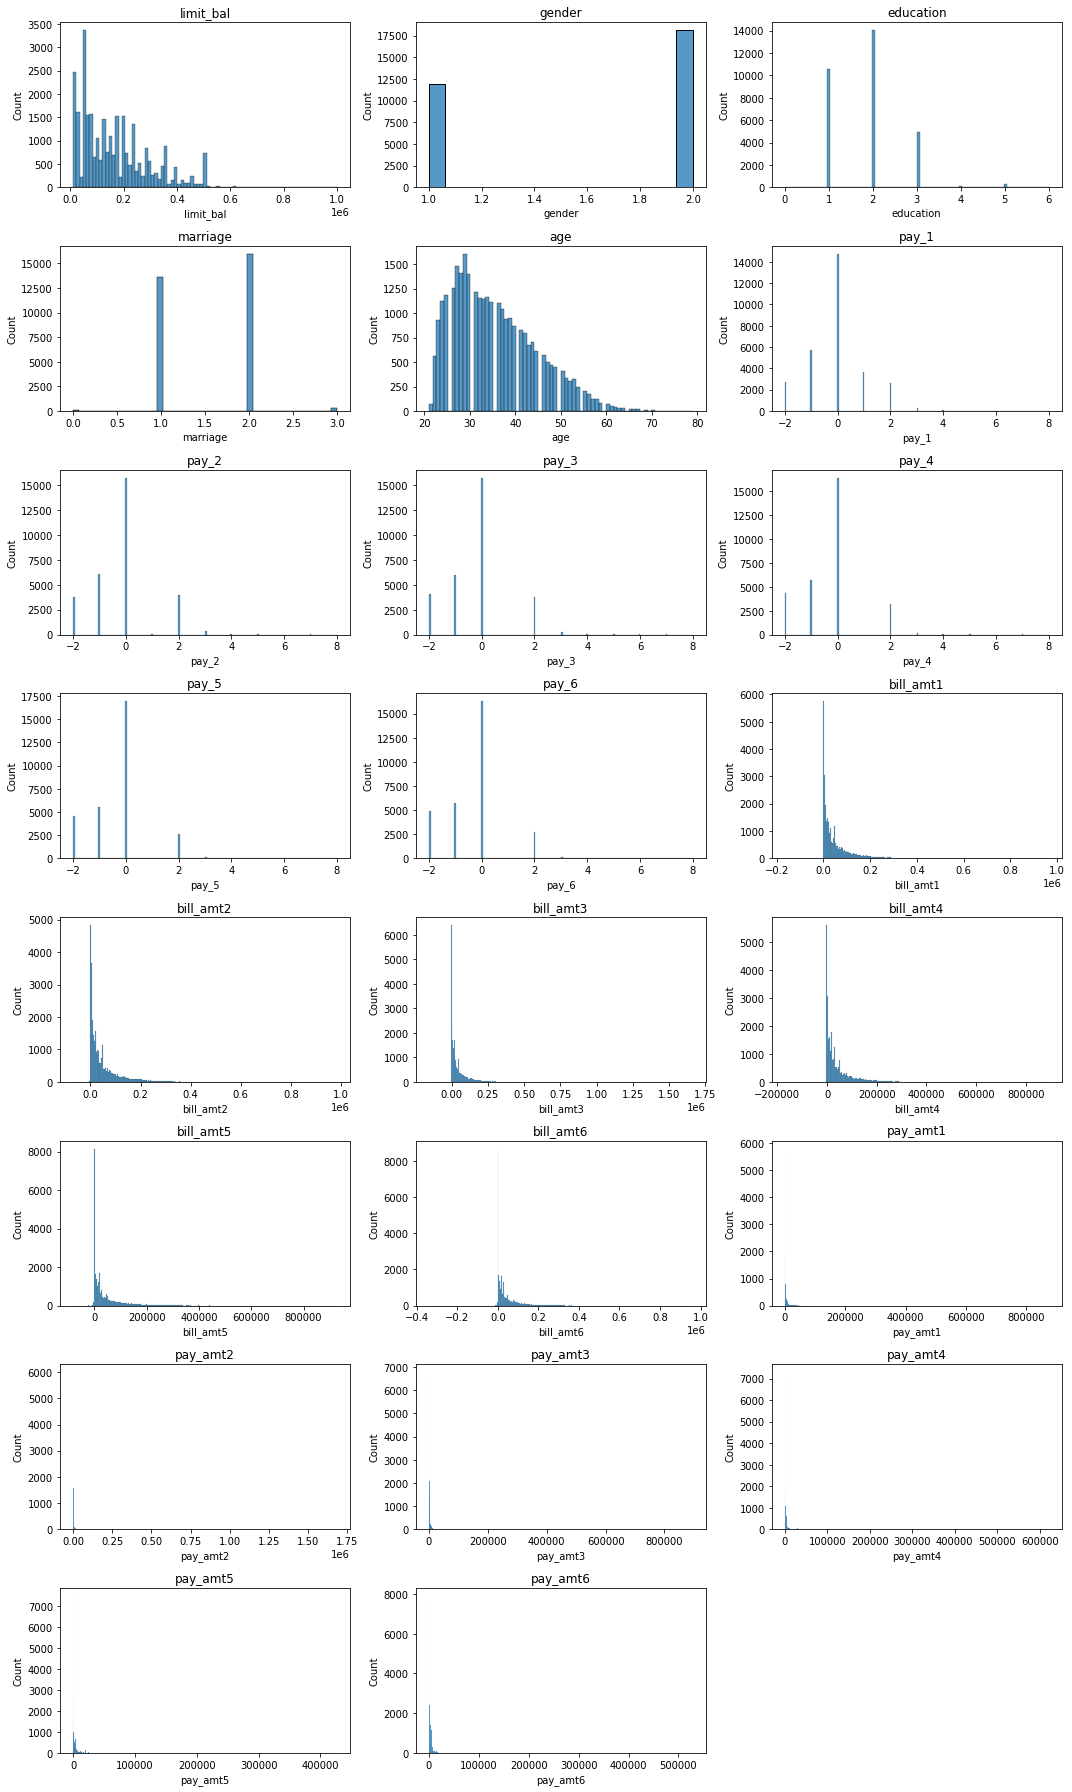

In [18]:
#Further understanding of the variables.

plt.figure(figsize=(15,25))

for i, column in enumerate(df_renamed.columns[:-1]):
  plt.subplot(8,3, i+1)
  plt.title(column)
  sns.histplot(df_renamed[column])
plt.tight_layout()
plt.show()

**Findings:** 


1.   limit_bal : all values lies between 0 and 0.6. Age is between 20 and 75.
2.   variables pay_1 to 5 lies between -1 and 10.
3.  variables pay_atm_1to 6 lie near around 0




In [19]:
# examine pay_1
df_renamed.pay_1.unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [20]:
df_renamed.pay_1.value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: pay_1, dtype: int64

In [21]:
# Convert the pay_1 to 6 variables into categorical.
pays = ["pay_" + str(i) for i in range(1,7)]
for name in pays:
  #df_renamed[name][df_renamed[name]<0] = 0
  #df_renamed[name][df_renamed[name]>0]=1
  df_renamed.loc[df_renamed[name]>0, name] = 1
  df_renamed.loc[df_renamed[name]<0, name] = 0

In [22]:
pays

['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [23]:
# Print the unique values are convertion.
for name in pays:
  print("variable",name,"has unique value", df_renamed[name].unique())

variable pay_1 has unique value [1 0]
variable pay_2 has unique value [1 0]
variable pay_3 has unique value [0 1]
variable pay_4 has unique value [0 1]
variable pay_5 has unique value [0 1]
variable pay_6 has unique value [0 1]


In [24]:
df_renamed.education.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

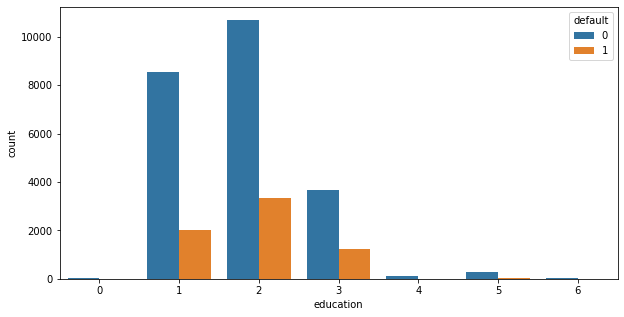

In [25]:

plt.figure(figsize=(10, 5))
ax = sns.countplot(x="education", hue="default", data=df_renamed)

**Most of the credit card holders are university or grad school degree holders**

**The credit card holders with Grad school degree are less likely to default next month when compared to high school or university graduates or toher categories.**

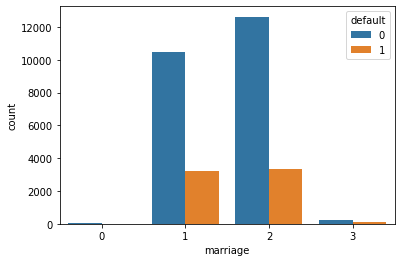

In [26]:
# 1 is maaried and 2 is single
ax= sns.countplot(x = "marriage",hue="default", data =df_renamed)


**Findings**
1.   Most of the customers are either married or single.
2.   Singles have less default payment when compared to married people.



In [27]:
# variable Education 
df_renamed.loc[df_renamed['education'].isin([0,4,5,6]), 'education'] = 4

In [28]:
df_renamed["education"].unique()

array([2, 1, 3, 4])

In [29]:
df_renamed.education.value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

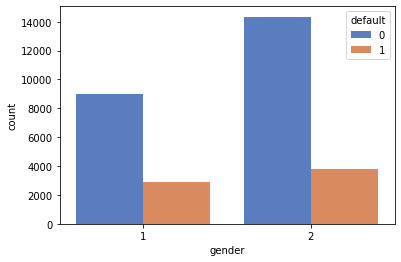

In [30]:
# Check the number of counts of defaulters and non defaulters based on gender
# 2 = female
# 1 = male

sns.countplot(x='gender', data=df_renamed,hue="default", palette="muted")


**Findings**
1.   Females have less default payments when compared to males.
2.  the fraction of non-defaulters in females is higher than defaulters portion.


In [31]:
df_renamed.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [32]:
df_renamed[['bill_amt1','bill_amt2','bill_amt3','bill_amt4','bill_amt5','bill_amt6']].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [33]:
df_renamed.shape

(30000, 24)

Feature scaling of numerical data

In [34]:
df_renamed.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


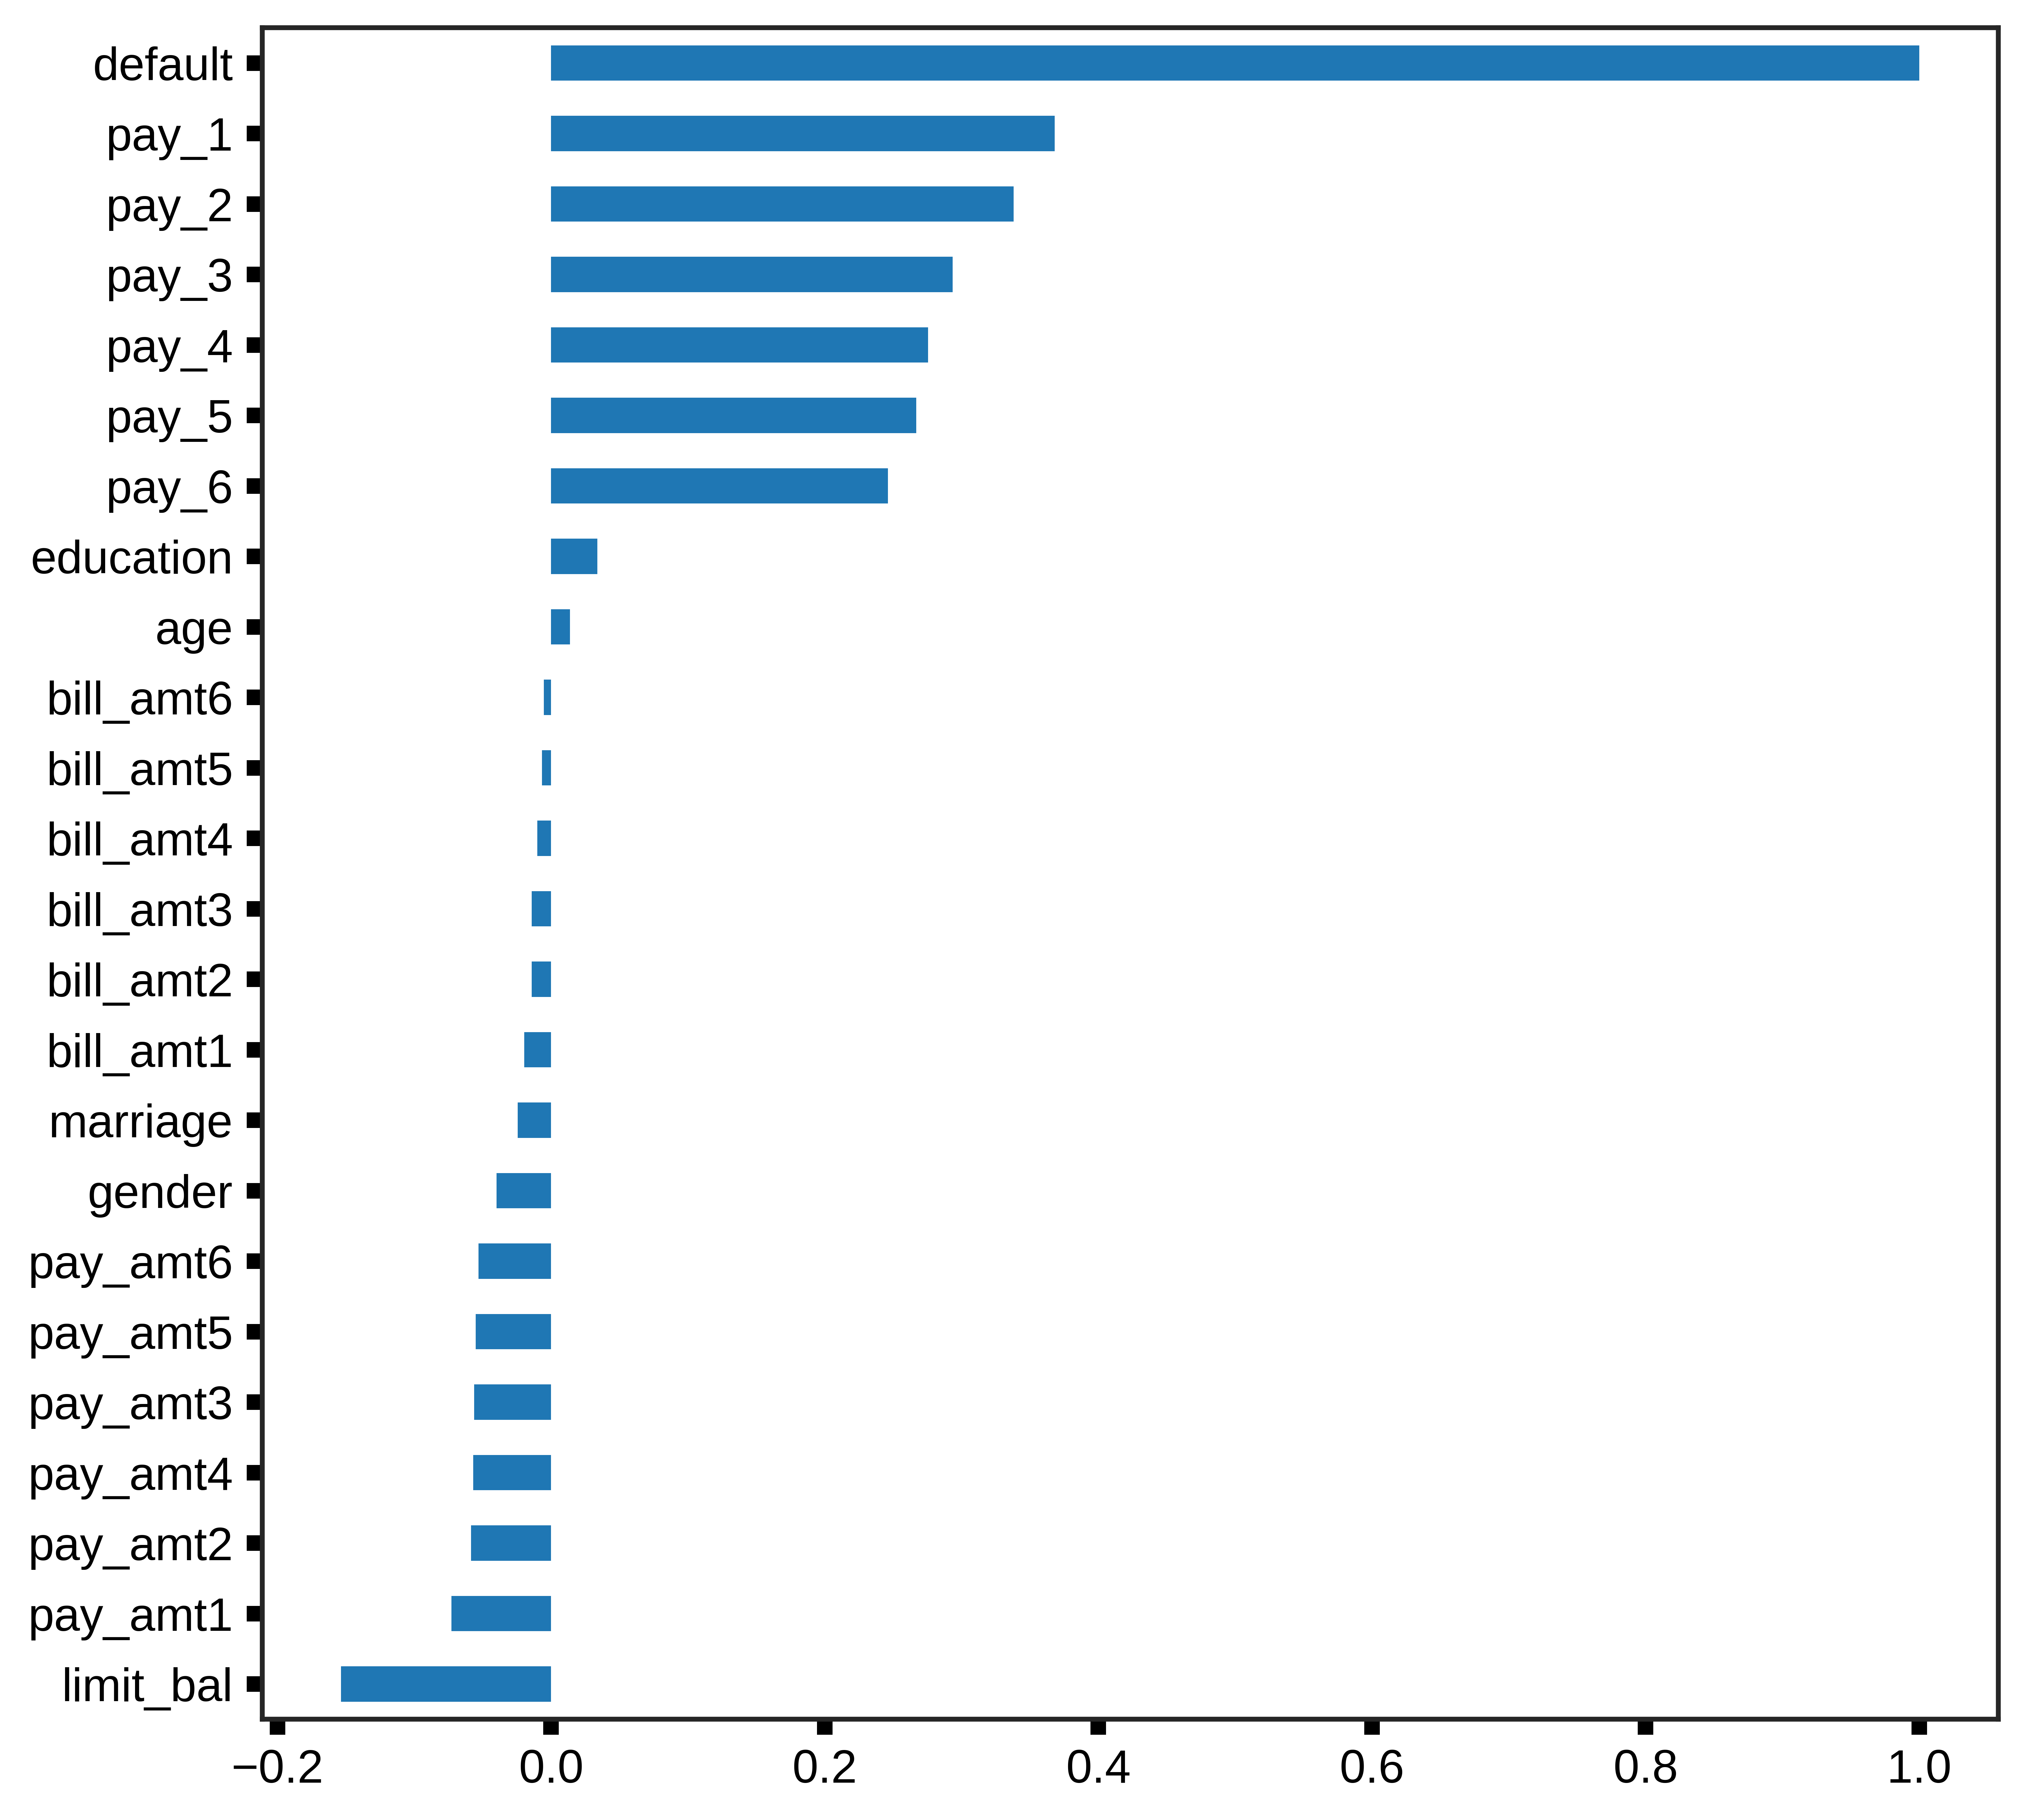

In [35]:
df_renamed.corr()
plt.style.use("seaborn-ticks")
plt.figure(figsize = (8,8),dpi=900)
plt.rcParams["axes.facecolor"] = "#FFFFFF"
plt.tick_params(axis = "x",colors = "black", direction = "out", length =4, width= 4)
plt.tick_params(axis = "y",colors = "black", direction = "out", length =4, width= 4)
plt.yticks( fontsize = 12)
plt.xticks( fontsize = 12, rotation=0)
df_renamed.corr()['default'].sort_values(ascending = True).plot(kind = 'barh')
#plt.grid(linestyle=':', linewidth='1', color='black')
plt.show()



1.   limit_bal is most -vely correlated and it is important variable which cannot be neglected.
2.   And pay_1 to 6 are highly correlated with the target variable.

3. bill_atm6 and bill_atm5 are least correlated with target.



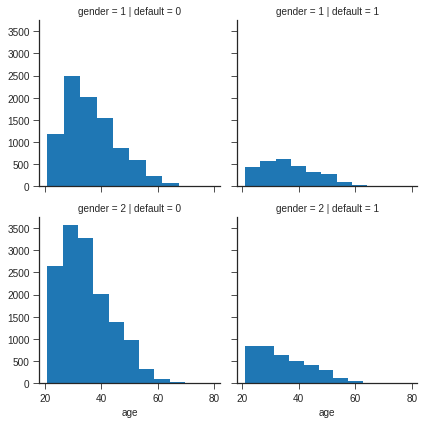

In [36]:
face= sns.FacetGrid(df_renamed, col = 'default', row = 'gender')
face.map(plt.hist, 'age')

Face grid Plot Non defaults have a higher proportion for age group 20-40years

In [37]:
for col in df_renamed.columns:
  print("Variable  is", col, "and the number of unique values are", df_renamed[col].nunique())

Variable  is limit_bal and the number of unique values are 81
Variable  is gender and the number of unique values are 2
Variable  is education and the number of unique values are 4
Variable  is marriage and the number of unique values are 4
Variable  is age and the number of unique values are 56
Variable  is pay_1 and the number of unique values are 2
Variable  is pay_2 and the number of unique values are 2
Variable  is pay_3 and the number of unique values are 2
Variable  is pay_4 and the number of unique values are 2
Variable  is pay_5 and the number of unique values are 2
Variable  is pay_6 and the number of unique values are 2
Variable  is bill_amt1 and the number of unique values are 22723
Variable  is bill_amt2 and the number of unique values are 22346
Variable  is bill_amt3 and the number of unique values are 22026
Variable  is bill_amt4 and the number of unique values are 21548
Variable  is bill_amt5 and the number of unique values are 21010
Variable  is bill_amt6 and the numbe

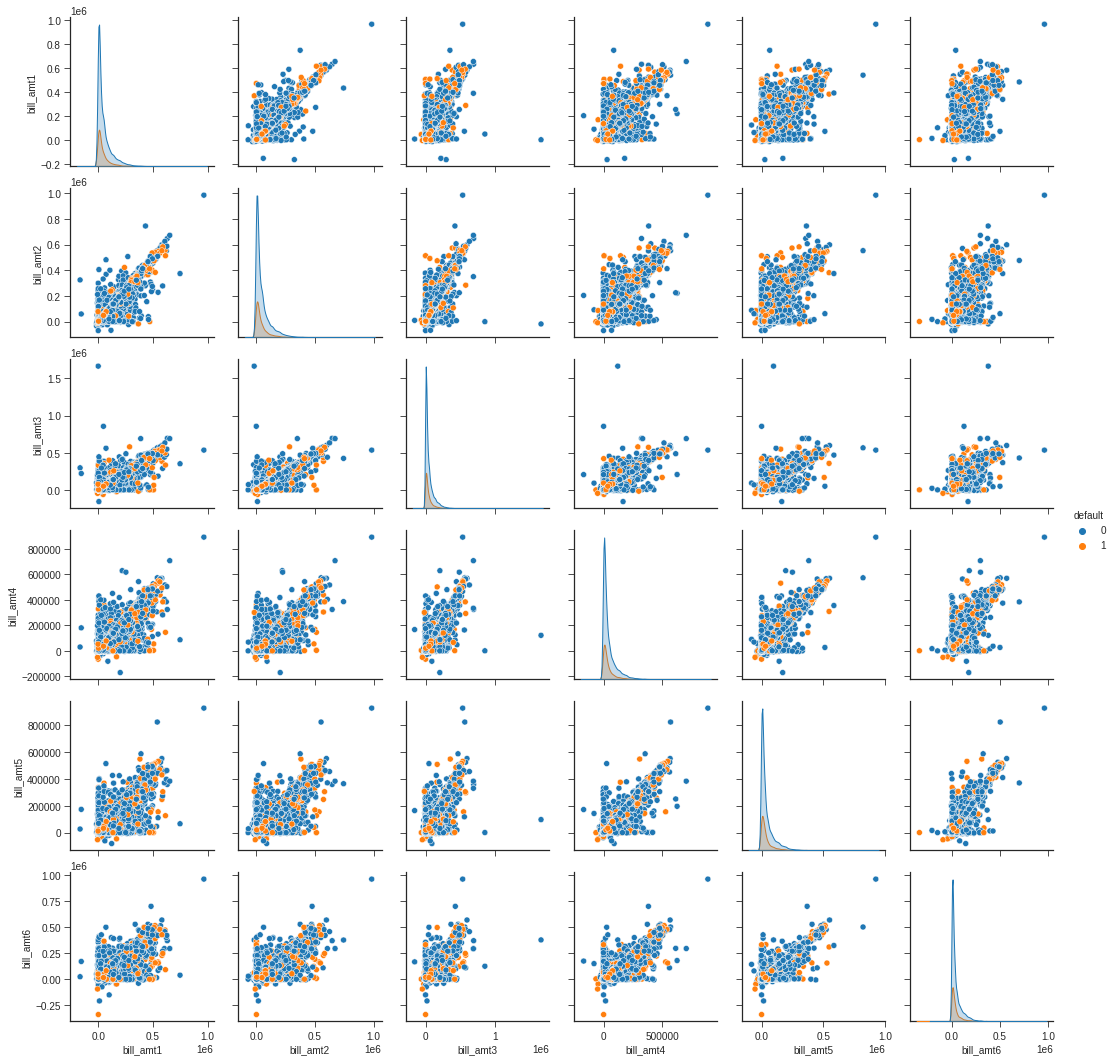

In [38]:
sns.pairplot(df_renamed, vars= df_renamed.columns[11:17], kind = "scatter", hue = "default")

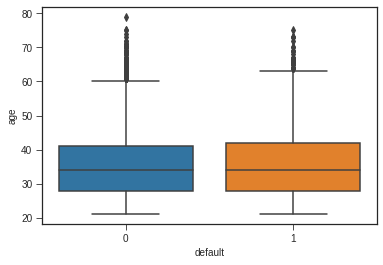

In [39]:
sns.boxplot(x='default',y='age',data=df_renamed)

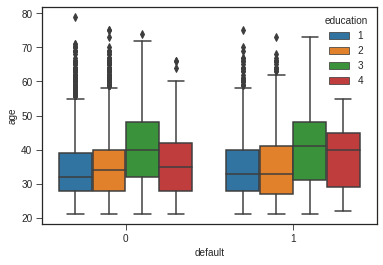

In [40]:
sns.boxplot(x='default',hue='education', y='age',data=df_renamed)

**Data preparation**

In [41]:
df_renamed.head()

,limit_bal,gender,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,20000.0,2,2,1,24,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [42]:
X = df_renamed.drop(["default"], axis =1)
y = df_renamed[["default"]]
dummy_var = pd.get_dummies(X, columns=["gender","education","marriage", "pay_1","pay_2","pay_3","pay_4","pay_5","pay_6"],drop_first=True)

In [43]:
dummy_var.head()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,gender_2,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,pay_1_1,pay_2_1,pay_3_1,pay_4_1,pay_5_1,pay_6_1
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0,1,1,0,0,0,0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1,0,0,0,1,0,0,1,0,0,0,1
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1,1,0,0,0,1,0,0,0,0,0,0,0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1,1,0,0,1,0,0,0,0,0,0,0,0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,1,0,0,0,0,0,0,0,0


**Train test split**

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.20, random_state = 42)

In [45]:
for train_index, test_index in split.split(df_renamed, df_renamed["default"]):
  X_train, y_train = dummy_var.iloc[train_index,:], y.iloc[train_index,:]
  X_test, y_test = dummy_var.iloc[test_index,:], y.iloc[test_index,:]
  

In [46]:
# Created a dictionary that has train and test data names as values to accesss in the for loop.
train_test = {"0":"X_train", "1":"y_train","2":"X_test","3":"y_test"}
for key in train_test:
  print("{}:{}".format(train_test[key],eval(train_test[key]).shape))
# check if classes were stratified
  if "y" in train_test[key]:
    print(train_test[key])
    print(np.sum(eval(train_test[key]))/eval(train_test[key]).shape[0])

X_train:(24000, 27)
y_train:(24000, 1)
y_train
default    0.221208
dtype: float64
X_test:(6000, 27)
y_test:(6000, 1)
y_test
default    0.221167
dtype: float64


**Obervations:**

the percentage of two classes of the target variable is equally distributed in both train and test data with 22 percent.

Data Normalization

In [47]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

**Functions for training and Evaluation**


In [48]:
# the following function trains the models on training data.
def train_model(classifier, X_train,y_train):
  # Fit the model on training data
  model.fit(X_train,y_train)
  print("Model is trained")

def predict_labels(classifier,X_test,y_test):

  y_preds = model.predict(X_test)
  Evaluation_F1 = f1_score(y_test,y_preds)

  return Evaluation_F1

def train_predict(classifier, X_train,y_train,X_test,y_test):

  # Name of the model and size of the training set.
  print ("Training a {} using a training set size of {}. . .".format(model.__class__.__name__, len(X_train)))

  train_model(classifier,X_train,y_train.ravel())

  print("F1 score for training set: {}".format(predict_labels(classifier, X_train,y_train.ravel())))
  print("F1 score for testing set:{}".format(predict_labels(classifier, X_test,y_test)))

**Untuned models**

In [49]:
# Testing the following base models

model_A = SVC()
model_B = KNeighborsClassifier(n_neighbors=3)
model_C = AdaBoostClassifier(n_estimators=10)
model_D = KNeighborsClassifier(n_neighbors=5)  
model_E = RandomForestClassifier(n_estimators = 100,n_jobs=1)
model_F = LogisticRegression()

for model in [model_A,model_B,model_C,model_D,model_E,model_F]:
  print ("\n{}: \n".format(model.__class__.__name__))

  for i, n in enumerate([20400,19200,16800,14500]):
    train_predict(model, np.array(X_train_norm[:n]), np.array(y_train[:n]).ravel(), np.array(X_test_norm), np.array(y_test))
    if i < 2: print ("----------------")
print("_________________________________________________")
print ("F1 score for predicting all \"yes\" on test set: {:.4f}".format(
    f1_score(y_test, [1]*len(y_test))))


SVC: 

Training a SVC using a training set size of 20400. . .
Model is trained
F1 score for training set: 0.470876585928489
F1 score for testing set:0.43940886699507387
----------------
Training a SVC using a training set size of 19200. . .
Model is trained
F1 score for training set: 0.47017001545595055
F1 score for testing set:0.4389763779527559
----------------
Training a SVC using a training set size of 16800. . .
Model is trained
F1 score for training set: 0.47696095673584243
F1 score for testing set:0.4381139489194499
Training a SVC using a training set size of 14500. . .
Model is trained
F1 score for training set: 0.4773279352226721
F1 score for testing set:0.4372230428360414

KNeighborsClassifier: 

Training a KNeighborsClassifier using a training set size of 20400. . .
Model is trained
F1 score for training set: 0.6490133672819859
F1 score for testing set:0.3878163878163878
----------------
Training a KNeighborsClassifier using a training set size of 19200. . .
Model is traine

**Findings**
1. It is clear from the training of the base models that SVC performed better with all the training data splits.
2. The SVC base model is more generalized model when compared to other models with training and test data F1 scores of 0.4 and 0.41 respectively.

3. So we select SVC model for further optimization and parameter tuning using gridsearch_cv

**Support Vector Classifier**

In [ ]:
sv_classifier = SVC()

**Randomizd search** for hyper parameters of SVC

In [ ]:
par_grid = {"C":[0.1,1,10,100,1000],
                "gamma": [1,0.1,0.01,0.001,0.0001],
                "kernel": ("rbf","linear","poly","sigmoid"),
            "degree":[2,3,4,5],
            "coef0" : [0.0,0.00001,0.0001,0.001,0.01,0.1],
            "shrinking":[True,False],
            "probability":[True,False],
            }

grid = RandomizedSearchCV(sv_classifier, par_grid, verbose=3)

In [ ]:
grid.fit(X_train_norm,np.array(y_train).ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10, score=0.786, total=  13.5s
[CV] shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.5s remaining:    0.0s


[CV]  shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10, score=0.799, total=  13.3s
[CV] shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.8s remaining:    0.0s


[CV]  shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10, score=0.796, total=  13.3s
[CV] shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10 
[CV]  shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10, score=0.796, total=  13.3s
[CV] shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10 
[CV]  shrinking=True, probability=False, kernel=sigmoid, gamma=0.001, degree=4, coef0=0.001, C=10, score=0.794, total=  13.1s
[CV] shrinking=False, probability=True, kernel=rbf, gamma=1, degree=5, coef0=0.0001, C=10 
[CV]  shrinking=False, probability=True, kernel=rbf, gamma=1, degree=5, coef0=0.0001, C=10, score=0.771, total= 6.4min
[CV] shrinking=False, probability=True, kernel=rbf, gamma=1, degree=5, coef0=0.0001, C=10 
[CV]  shrinking=False, probability=True, kernel=rbf, gamma=1, degree=5, coef0=0.0001, C=10, score=0.770, total= 6.4min
[CV] s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 128.3min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'coef0': [0.0, 1e-05, 0.0001, 0.001,
                                                  0.01, 0.1],
                                        'degree': [2, 3, 4, 5],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ('rbf', 'linear', 'poly',
                                

In [ ]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=5, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=False,
    tol=0.001, verbose=False)

In [ ]:
#The optimized parameters for SVC according to randomizedsearchCV.
grid.best_params_

{'C': 10,
 'coef0': 0.1,
 'degree': 5,
 'gamma': 0.001,
 'kernel': 'rbf',
 'probability': False,
 'shrinking': False}

In [ ]:
grid.best_score_

0.802375

Confusion Matrix


AxesSubplot(0.125,0.125;0.62x0.755)


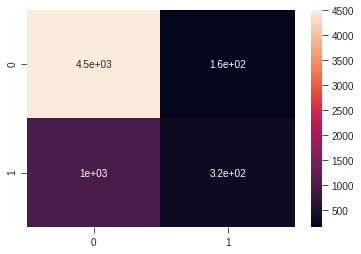

In [ ]:
SVC_predictions = grid.predict(X_test_norm)
print("Confusion Matrix")
print("\n")
print(sns.heatmap((confusion_matrix(y_test,SVC_predictions)),annot=True))
# 0 is NO, NOT NEXT MONTH DFAULTER
# 1 is YES, DEFAULTER

**Findings**

1. The optimized support vector classifier has TRUE POSITIVES of 320 and TRUE NEGATIVES of 4500.

*   SVC model IDENTIFIED 320 as customers who are  willing to default next month bill who are actually willing to default.

*   SVC correctly identified 4500 customers as GENUINE who are actually GENUINE

2. The optimized SVC has FALSE NEGATIVES of 160 and FLASE POSITIVES of 1000.

*   SVC model wrongly predicted that 160 who are  willing to default the next month payment as GENUINE AND WONT DEFAULT NEXT MONTH.
*   SVC model wrongly predicted 1000 GENUINE CUSTOMERS as potential next month defaulters.






In [ ]:
print("Classification report")
print("\n")
print(classification_report(y_test,SVC_predictions))

Classification report


              precision    recall  f1-score   support

           0       0.82      0.96      0.88      4673
           1       0.66      0.24      0.35      1327

    accuracy                           0.80      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.78      0.80      0.77      6000



**Concluions**


*   From Exploratory data analysis, we see that customers with the features as follow
Gender: Female, 
Education:higher education
Status: single
Age : Between 30-40 
are more likely to pay the credit card bills on time.


*   Out of all Untuned models SVC performed better on all 3 train test splits (85%,80%, 70%, and 60%) with train and test F1 scores of 0.47 and 0.43.



*   After hyperparameter optimization SVC accuracy of 80%

